#predict energy usage of application
Data used include measurements of temperature and humidity sensors from a wireless network, whether from a nearby airport station and recorded energy use of lighting fixtures. The project discusses data filtering to remove non-predictive parameters and feature ranking. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).


#Attribute Information:

#date time year-month-day hour:minute:second 
#Appliances, energy use in Wh 
#lights, energy use of light fixtures in the house in Wh 
#T1, Temperature in kitchen area, in Celsius 
#RH_1, Humidity in kitchen area, in % 
#T2, Temperature in living room area, in Celsius 
#RH_2, Humidity in living room area, in % 
#T3, Temperature in laundry room area 
#RH_3, Humidity in laundry room area, in % 
#T4, Temperature in office room, in Celsius 
#RH_4, Humidity in office room, in % 
#T5, Temperature in bathroom, in Celsius 
#RH_5, Humidity in bathroom, in % 
#T6, Temperature outside the building (north side), in Celsius 
#RH_6, Humidity outside the building (north side), in % 
#T7, Temperature in ironing room , in Celsius 
#RH_7, Humidity in ironing room, in % 
#T8, Temperature in teenager room 2, in Celsius 
#RH_8, Humidity in teenager room 2, in % 
#T9, Temperature in parents room, in Celsius 
#RH_9, Humidity in parents room, in % 
#To, Temperature outside (from Chievres weather station), in Celsius 
#Pressure (from Chievres weather station), in mm Hg 
#RH_out, Humidity outside (from Chievres weather station), in % 
#Wind speed (from Chievres weather station), in m/s 
#Visibility (from Chievres weather station), in km 
#Tdewpoint (from Chievres weather station), Â°C 
#rv1, Random variable 1, nondimensional 
#rv2, Random variable 2, nondimensional 

In [ ]:
# road map

# import data set
# data preprocessing
# feature creation
# EDA
# model creation 
# validation 
# prediction

#regression based model and other supervised models

In [2]:
# import data

In [1]:
data_train = read.csv('training.csv')

In [2]:
data_test = read.csv('testing.csv')

In [6]:
head(data_train)

date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
2016-01-11 17:00:00,60,30,19.89000,47.59667,19.2,44.79000,19.79,44.73000,19.00000,...,733.5000,92.00000,7.000000,63.00000,5.300000,13.27543,13.27543,61200,Weekday,Monday
2016-01-11 17:10:00,60,30,19.89000,46.69333,19.2,44.72250,19.79,44.79000,19.00000,...,733.6000,92.00000,6.666667,59.16667,5.200000,18.60619,18.60619,61800,Weekday,Monday
2016-01-11 17:20:00,50,30,19.89000,46.30000,19.2,44.62667,19.79,44.93333,18.92667,...,733.7000,92.00000,6.333333,55.33333,5.100000,28.64267,28.64267,62400,Weekday,Monday
2016-01-11 17:40:00,60,40,19.89000,46.33333,19.2,44.53000,19.79,45.00000,18.89000,...,733.9000,92.00000,5.666667,47.66667,4.900000,10.08410,10.08410,63600,Weekday,Monday
2016-01-11 17:50:00,50,40,19.89000,46.02667,19.2,44.50000,19.79,44.93333,18.89000,...,734.0000,92.00000,5.333333,43.83333,4.800000,44.91948,44.91948,64200,Weekday,Monday
2016-01-11 18:10:00,60,50,19.85667,45.56000,19.2,44.50000,19.73,44.90000,18.89000,...,734.1667,91.83333,5.166667,40.00000,4.683333,33.03989,33.03989,65400,Weekday,Monday


In [7]:
colnames(data_train)

[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "rv1"         "rv2"         "NSM"        
[31] "WeekStatus"  "Day_of_week"

In [11]:
#data_train$WeekStatus

In [12]:
head(data_test,3)

date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
2016-01-11 17:30:00,50,40,19.89000,46.06667,19.20000,44.59,19.79,45.0,18.89,...,733.8000,92.00000,6.000000,51.5,5.000000,45.41039,45.41039,63000,Weekday,Monday
2016-01-11 18:00:00,60,50,19.89000,45.76667,19.20000,44.50,19.79,44.9,18.89,...,734.1000,92.00000,5.000000,40.0,4.700000,47.23376,47.23376,64800,Weekday,Monday
2016-01-11 18:40:00,230,70,19.92667,45.86333,19.35667,44.40,19.79,44.9,18.89,...,734.3667,91.33333,5.666667,40.0,4.633333,10.29873,10.29873,67200,Weekday,Monday


In [13]:
dim(data_train)

[1] 14803    32

In [14]:
dim(data_test)

[1] 4932   32

In [15]:
str(data_train)

'data.frame':	14803 obs. of  32 variables:
 $ date       : Factor w/ 14803 levels "2016-01-11 17:00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Appliances : int  60 60 50 60 50 60 60 70 430 250 ...
 $ lights     : int  30 30 30 40 40 50 40 40 50 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num  47.6 46.7 46.3 46.3 46 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.6 44.5 44.5 ...
 $ T3         : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num  44.7 44.8 44.9 45 44.9 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.9 45.5 45.7 ...
 $ T5         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_5       : num  55.2 55.2 55.1 55.1 55 ...
 $ T6         : num  7.03 6.83 6.56 6.37 6.3 ...
 $ RH_6       : num  84.3 84.1 83.2 84.9 85.8 ...
 $ T7         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_7       : num  41.6 41.6 41.4 41.2 41.3 ...
 $ T8         : num  18.2 18.2 18.2 18.1 18.1 ...
 $ RH_8       : nu

In [13]:
library(rpart)
library(gbm)
library(doParallel)
library(pROC)

library(corrplot)
library(psych)
library(lubridate)

Warning message:
"package 'gbm' was built under R version 3.4.3"Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3
Warning message:
"package 'doParallel' was built under R version 3.4.3"Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.4.3"Loading required package: iterators
Warning message:
"package 'iterators' was built under R version 3.4.3"Warning message:
"package 'pROC' was built under R version 3.4.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'corrplot' was built under R version 3.4.3"corrplot 0.84 loaded
Warning message:
"package 'psych' was built under R version 3.4.3"
Attaching package: 'psych'

The following objects are masked from 'pa

In [ ]:
# modifying date

In [4]:
df = rbind(data_train,data_test)

In [5]:
dim(df)

[1] 19735    32

In [6]:
df$date = as.character(df$date)

In [7]:
df$date = strptime(df$date,format = "%Y-%m-%d %H:%M:%S")

In [8]:
df$date = as.POSIXct(df$date,tz = "UTC")

In [9]:
class(df$date)

[1] "POSIXct" "POSIXt"

In [10]:
second_day <- function(x){
    s <- hour(x)*3600+minute(x)*60+second(x)
}

In [11]:
weekend <- function(x){
    ind <- weekdays(x)
    if( ind == 'Saturday' | ind == 'Sunday' ) {
        ind2 = 'Weekend'
    }
    else {
        ind2 = 'Weekday'
    }
    return(ind2)
}

In [12]:
df1 = second_day(df$date)

In [13]:
head(df1)

[1] 61200 61800 62400 63600 64200 65400

In [14]:
unique(df$WeekStatus)

[1] Weekday Weekend
Levels: Weekday Weekend

In [45]:
unique(df$Day_of_week)

[1] Monday    Tuesday   Wednesday Thursday  Friday    Saturday  Sunday   
Levels: Friday Monday Saturday Sunday Thursday Tuesday Wednesday

In [46]:
summary(df)

      date                       Appliances          lights      
 Min.   :2016-01-11 17:00:00   Min.   :  10.00   Min.   : 0.000  
 1st Qu.:2016-02-14 23:15:00   1st Qu.:  50.00   1st Qu.: 0.000  
 Median :2016-03-20 05:30:00   Median :  60.00   Median : 0.000  
 Mean   :2016-03-20 05:30:00   Mean   :  97.69   Mean   : 3.802  
 3rd Qu.:2016-04-23 11:45:00   3rd Qu.: 100.00   3rd Qu.: 0.000  
 Max.   :2016-05-27 18:00:00   Max.   :1080.00   Max.   :70.000  
                                                                 
       T1             RH_1             T2             RH_2      
 Min.   :16.79   Min.   :27.02   Min.   :16.10   Min.   :20.46  
 1st Qu.:20.76   1st Qu.:37.33   1st Qu.:18.79   1st Qu.:37.90  
 Median :21.60   Median :39.66   Median :20.00   Median :40.50  
 Mean   :21.69   Mean   :40.26   Mean   :20.34   Mean   :40.42  
 3rd Qu.:22.60   3rd Qu.:43.07   3rd Qu.:21.50   3rd Qu.:43.26  
 Max.   :26.26   Max.   :63.36   Max.   :29.86   Max.   :56.03  
                 

In [47]:
# ploting importent varibles

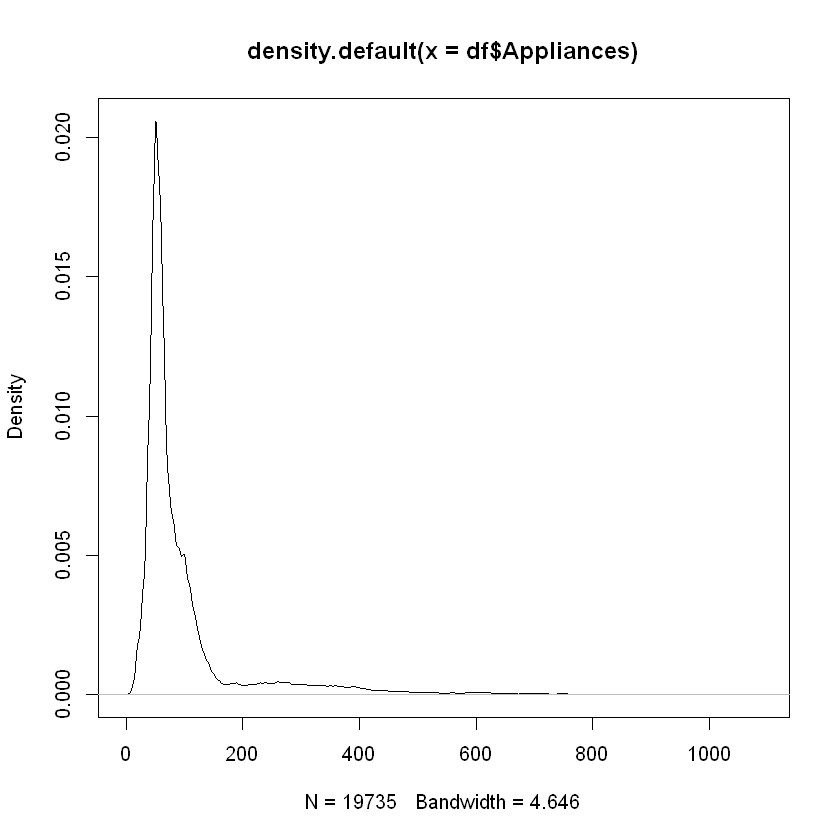

In [48]:
plot(density(df$Appliances))

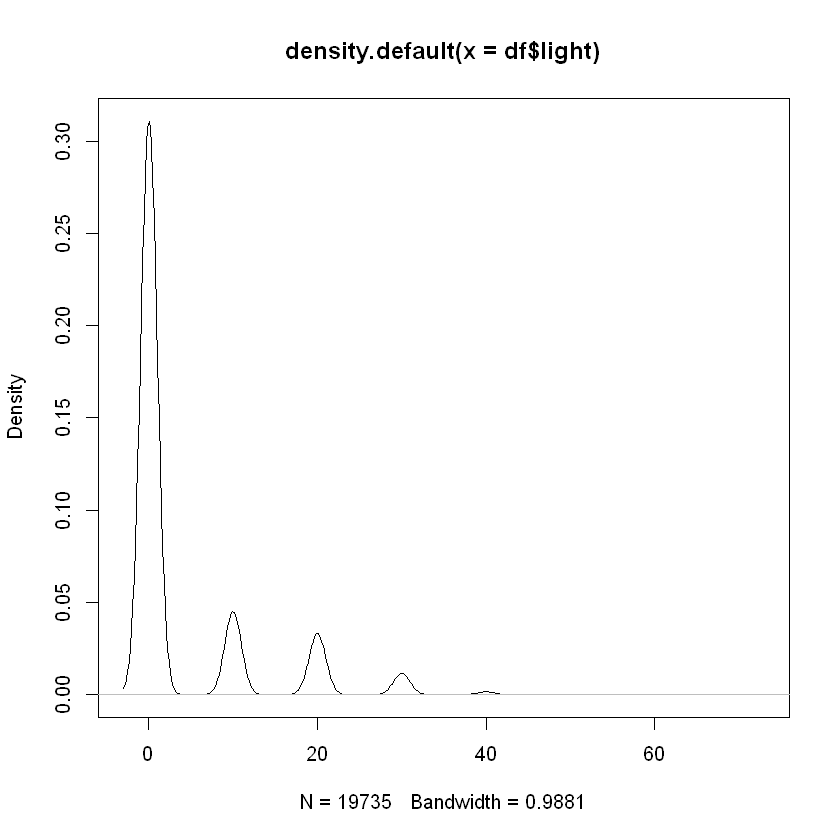

In [49]:
plot(density(df$light))

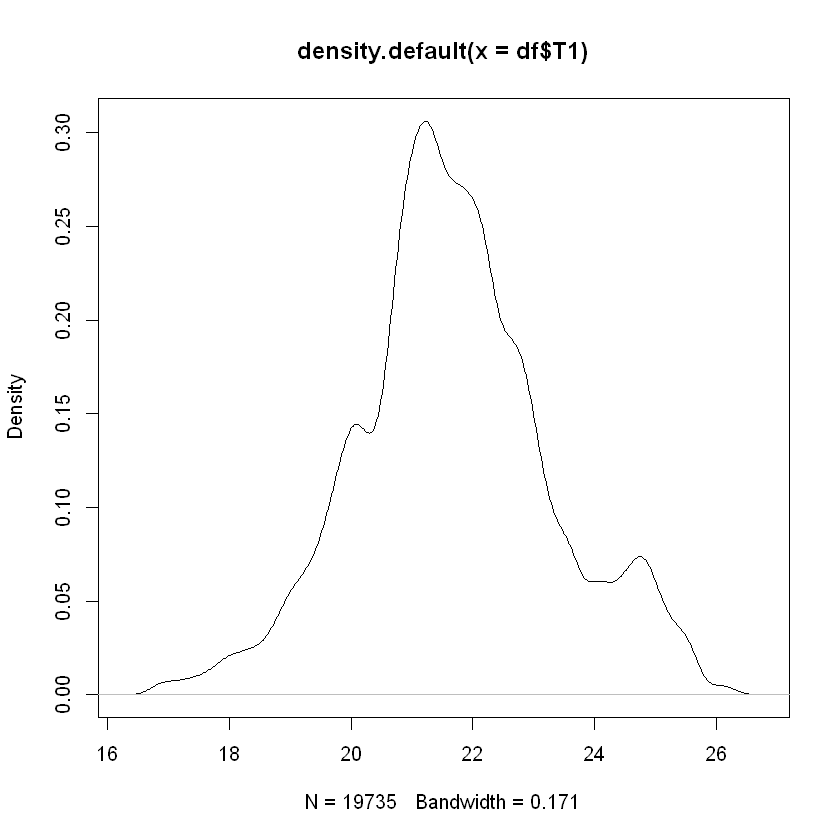

In [50]:
plot(density(df$T1))

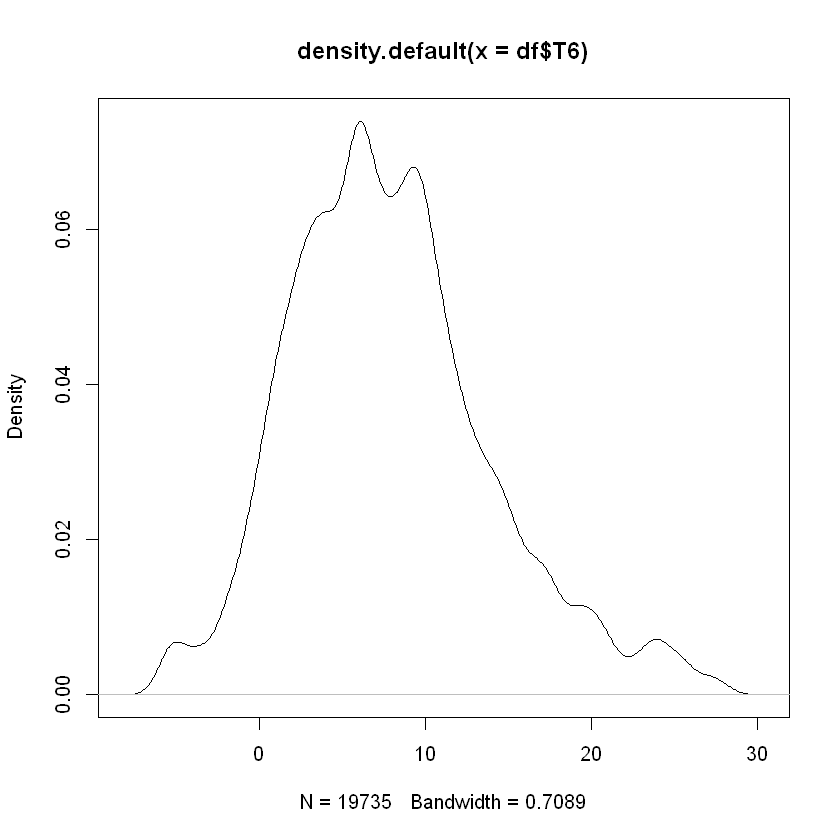

In [51]:
plot(density(df$T6))

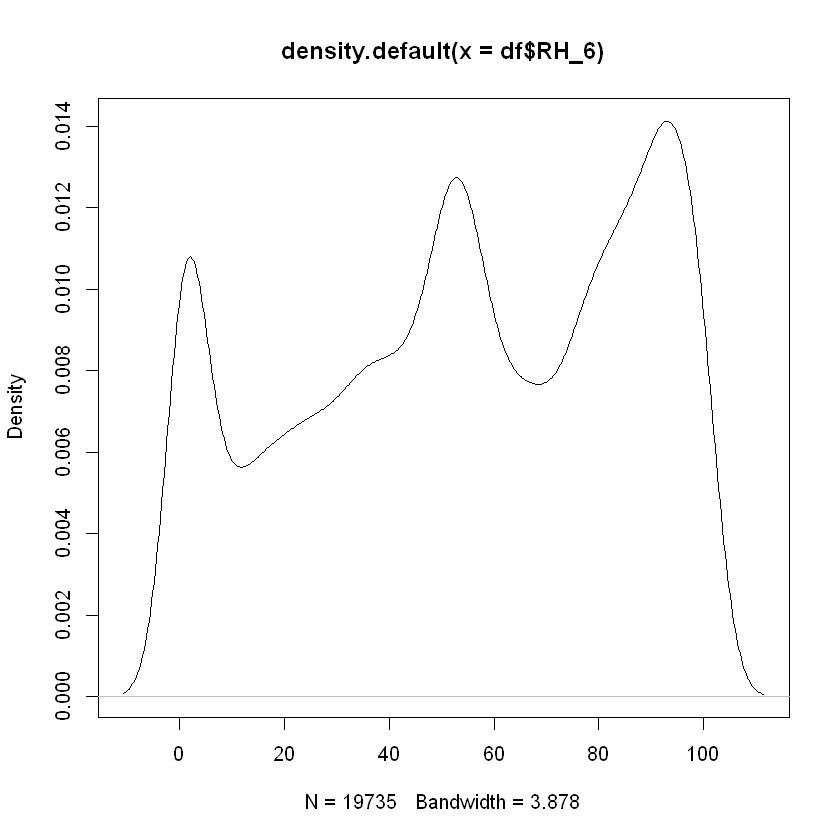

In [52]:
plot(density(df$RH_6))

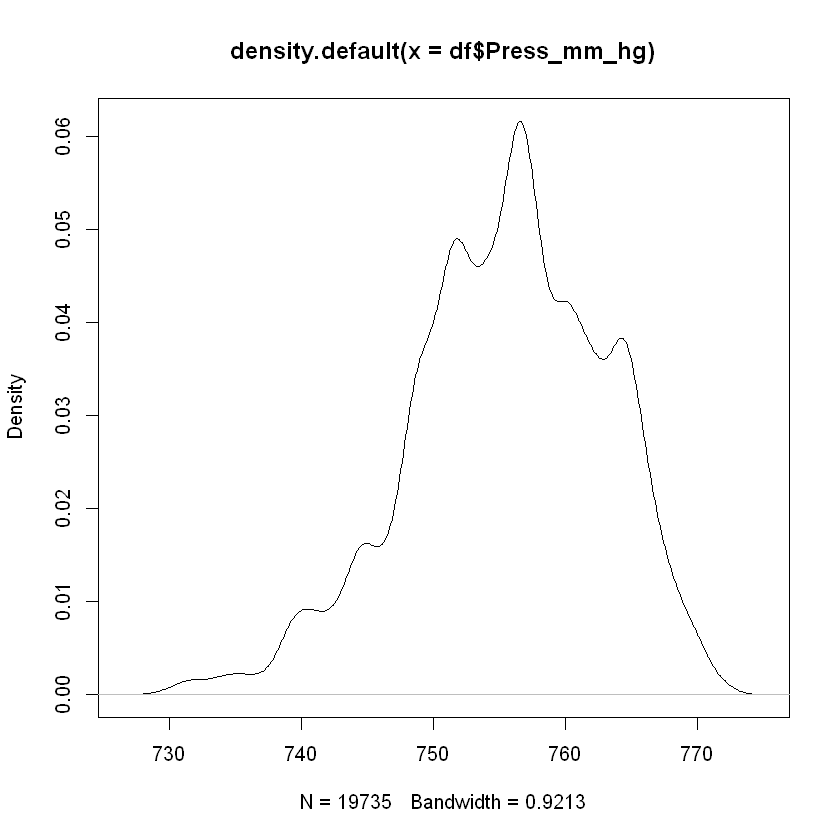

In [53]:
plot(density(df$Press_mm_hg))

In [15]:
library(ggplot2)
library(gridExtra)

Warning message:
"package 'ggplot2' was built under R version 3.4.3"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Warning message:
"package 'gridExtra' was built under R version 3.4.3"

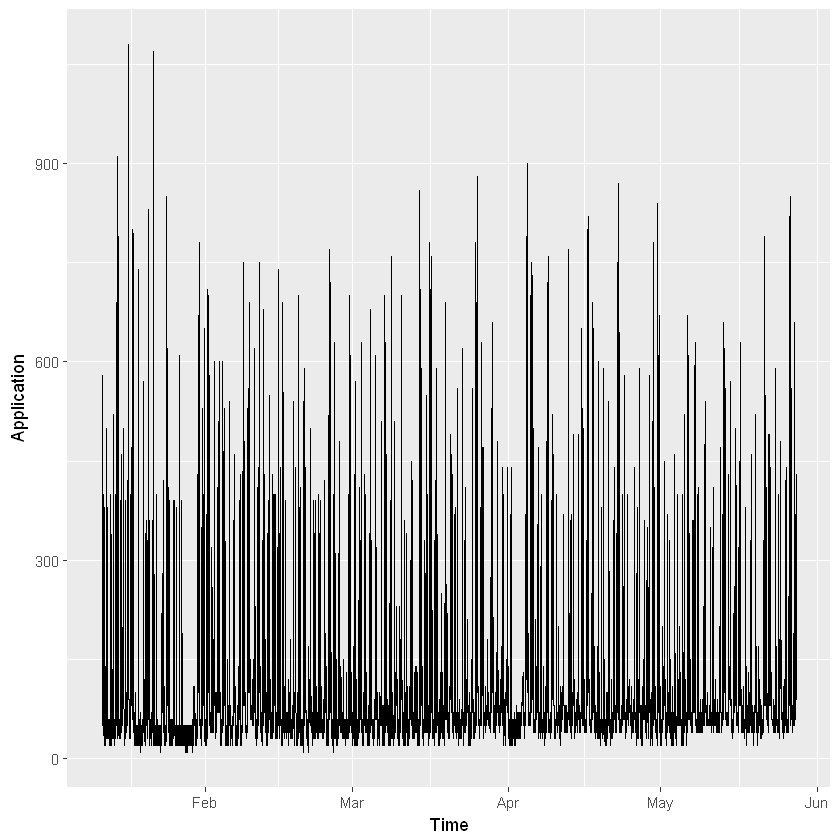

In [60]:
qplot(df$date,df$Appliances,xlab = 'Time',ylab = 'Application',geom = 'line')

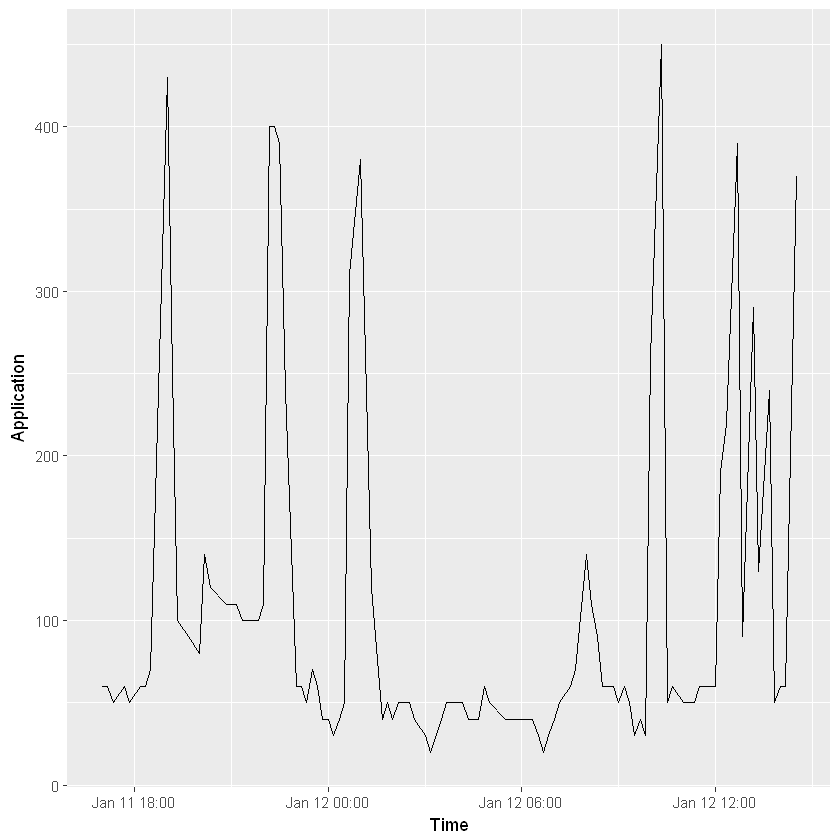

In [63]:
qplot(df$date[1:100],df$Appliances[1:100], geom='line',xlab='Time',ylab='Application')

In [64]:
# define and compute the outlines

In [65]:
# interquatile range 

[1] 2138

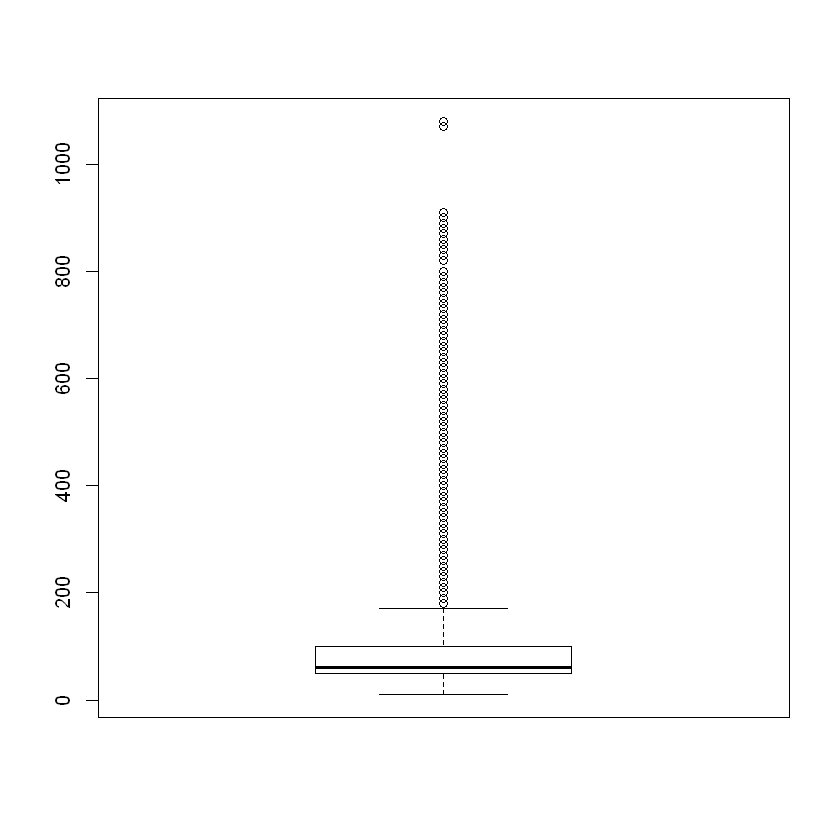

In [70]:
length((boxplot(df$Appliances))$out)

[1] 4483

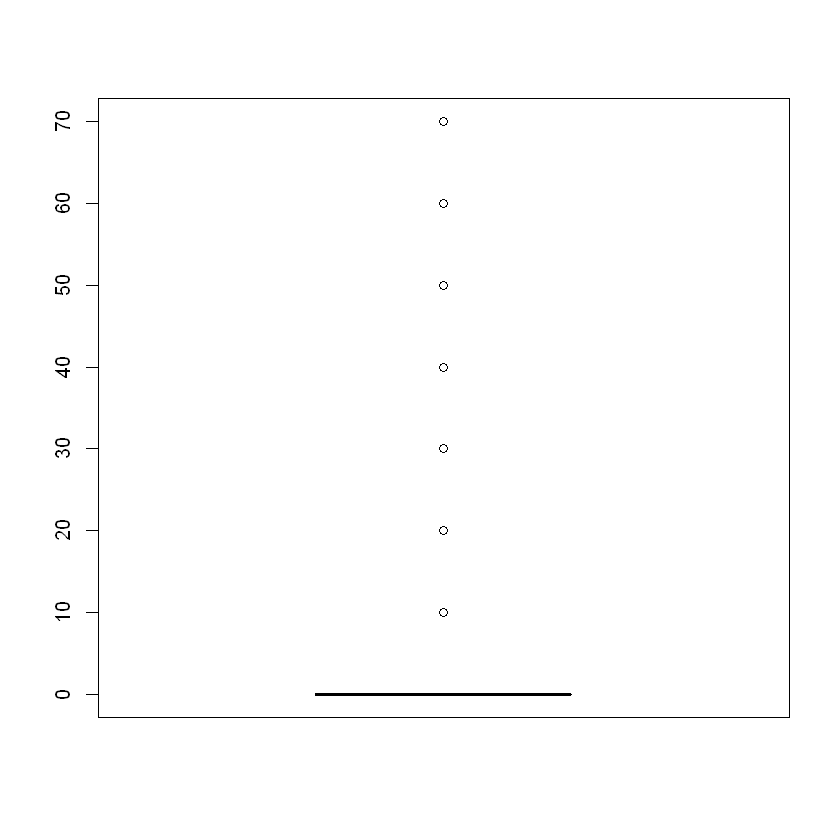

In [75]:
length((boxplot(df$lights))$out)

[1] 19735    32

[1] 515

[1] 546

[1] 217

[1] 186

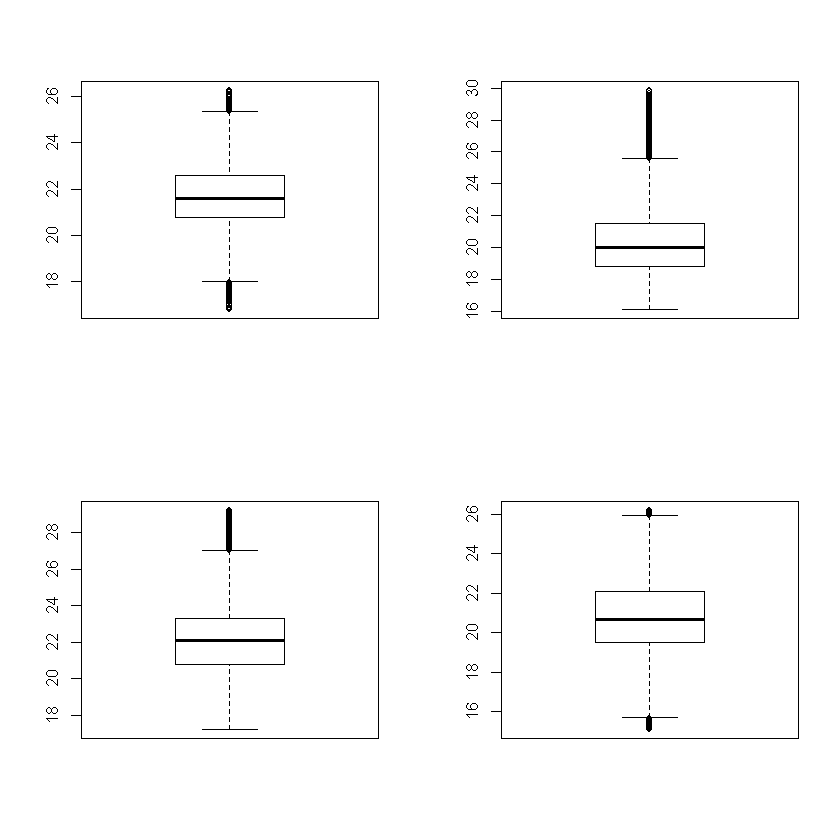

In [87]:
par(mfrow = c(2,2))
dim(df)
length((boxplot(df$T1))$out)
length(boxplot(df$T2)$out)
length(boxplot(df$T3)$out)
length(boxplot(df$T4)$out)

In [ ]:
# now lets see energy usage by hour and week 

In [16]:
df$month = floor_date(df$date,'month')

In [17]:
df$hour = floor_date(df$date,'hour')

In [18]:
library('plyr') # Tools for Splitting, Applying and Combining Data

Warning message:
"package 'plyr' was built under R version 3.4.3"
Attaching package: 'plyr'

The following object is masked from 'package:lubridate':

    here



In [4]:
#ddply(df,'hour',summarise,Appliances = sum(Appliances))

In [21]:
head(wday(df$hour,label = T))

[1] Mon Mon Mon Mon Mon Mon
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

In [22]:
unique(week(df$hour))

[1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


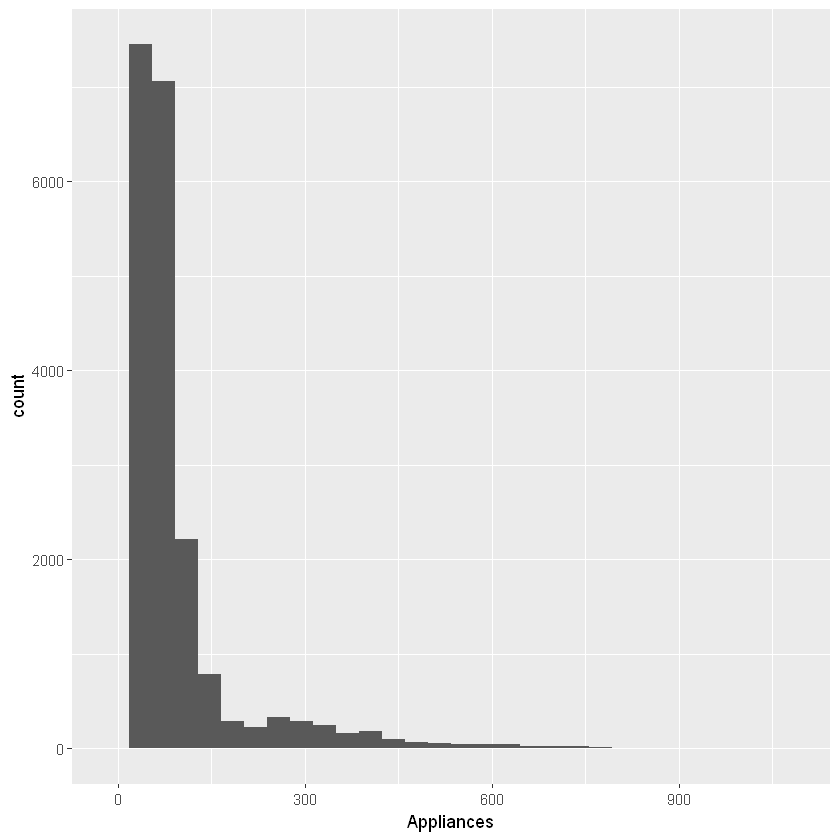

In [23]:
ggplot(df,aes(x = Appliances)) + geom_histogram()

In [24]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [25]:
names(df)

#select()
#filter()
#arrange()

[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "rv1"         "rv2"         "NSM"        
[31] "WeekStatus"  "Day_of_week" "month"       "hour"

In [35]:
d = select(df,Appliances,Day_of_week)

In [36]:
head(d)

Appliances,Day_of_week
60,Monday
60,Monday
50,Monday
60,Monday
50,Monday
60,Monday


In [34]:
#select(df,NSM:hour)

In [31]:
c = df %>% select(NSM:hour) %>% filter(Day_of_week == 'Monday',NSM >= 65000)

In [33]:
head(c)

NSM,WeekStatus,Day_of_week,month,hour
65400,Weekday,Monday,2016-01-01,2016-01-11 18:00:00
66000,Weekday,Monday,2016-01-01,2016-01-11 18:00:00
66600,Weekday,Monday,2016-01-01,2016-01-11 18:00:00
68400,Weekday,Monday,2016-01-01,2016-01-11 19:00:00
69000,Weekday,Monday,2016-01-01,2016-01-11 19:00:00
69600,Weekday,Monday,2016-01-01,2016-01-11 19:00:00


In [30]:
# lets do some more visulaization

In [38]:
energy_usage_per_hour = ddply(df,'hour',summarise,Appliances = sum(Appliances))

In [39]:
energy_usage_per_hour$wday <- wday(energy_usage_per_hour$hour,label = T)

In [40]:
head(energy_usage_per_hour)

hour,Appliances,wday
2016-01-11 17:00:00,330,Mon
2016-01-11 18:00:00,1060,Mon
2016-01-11 19:00:00,1040,Mon
2016-01-11 20:00:00,750,Mon
2016-01-11 21:00:00,620,Mon
2016-01-11 22:00:00,1600,Mon


In [41]:
df$Day_of_week <- as.factor(df$Day_of_week)

In [42]:
df$WeekStatus <- as.factor(df$WeekStatus)

In [44]:
# lets impove the previous plot

In [45]:
require(gridExtra)

In [46]:
plot1 <- qplot(df$date,df$Appliances,xlab = 'Time' ,ylab= 'Appliances',geom = 'line')

In [47]:
plot2 <- qplot(df$date[1:1008],df$Appliances[1:1008],xlab = 'Time' ,ylab= 'Appliances',geom = 'line')

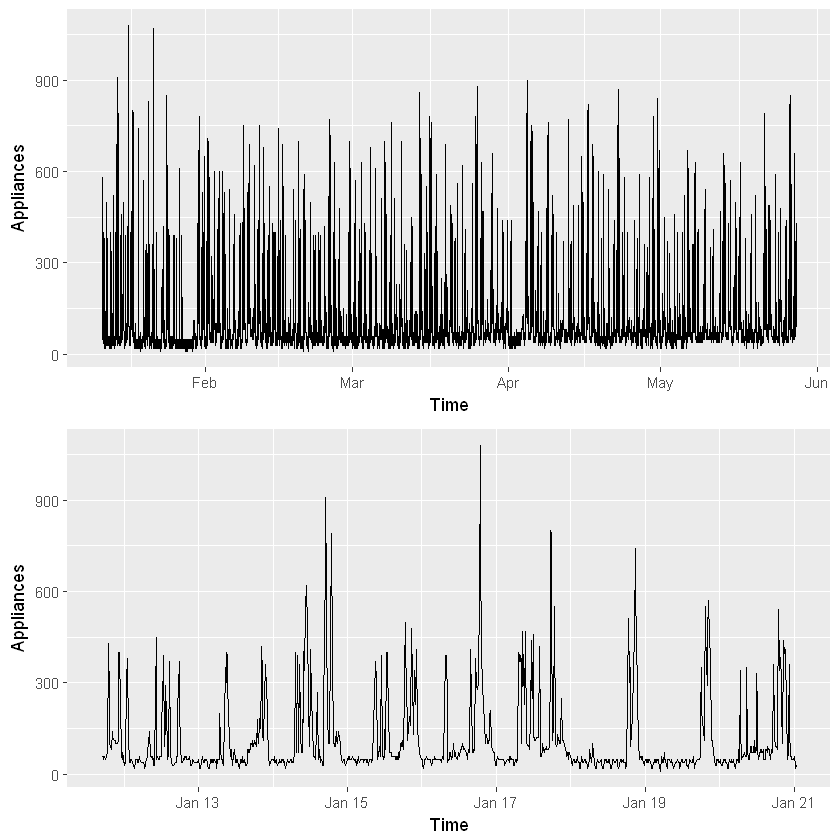

In [48]:
grid.arrange(plot1,plot2)

In [51]:
summary(energy_usage_per_hour)

      hour                       Appliances    wday    
 Min.   :2016-01-11 17:00:00   Min.   : 170   Sun:456  
 1st Qu.:2016-02-14 23:15:00   1st Qu.: 300   Mon:463  
 Median :2016-03-20 05:30:00   Median : 380   Tue:480  
 Mean   :2016-03-20 05:30:00   Mean   : 586   Wed:480  
 3rd Qu.:2016-04-23 11:45:00   3rd Qu.: 660   Thu:480  
 Max.   :2016-05-27 18:00:00   Max.   :3650   Fri:475  
                                              Sat:456  

In [52]:
energy_usage_per_hour$week_of_year <- week(energy_usage_per_hour$hour)

In [54]:
unique(energy_usage_per_hour$week_of_year)

[1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

In [56]:
energy_usage_per_hour$hour_date <- hour(energy_usage_per_hour$hour)

In [57]:
max(energy_usage_per_hour$Appliances)

[1] 3650

In [58]:
min(energy_usage_per_hour$Appliances)

[1] 170

In [63]:
head(energy_usage_per_hour)

hour,Appliances,wday,week_of_year,hour_date
2016-01-11 17:00:00,330,Mon,2,17
2016-01-11 18:00:00,1060,Mon,2,18
2016-01-11 19:00:00,1040,Mon,2,19
2016-01-11 20:00:00,750,Mon,2,20
2016-01-11 21:00:00,620,Mon,2,21
2016-01-11 22:00:00,1600,Mon,2,22


In [65]:

gg1 <-ggplot(energy_usage_per_hour,aes(x=wday,y=hour_date,
                                                          fill=Appliances)) 


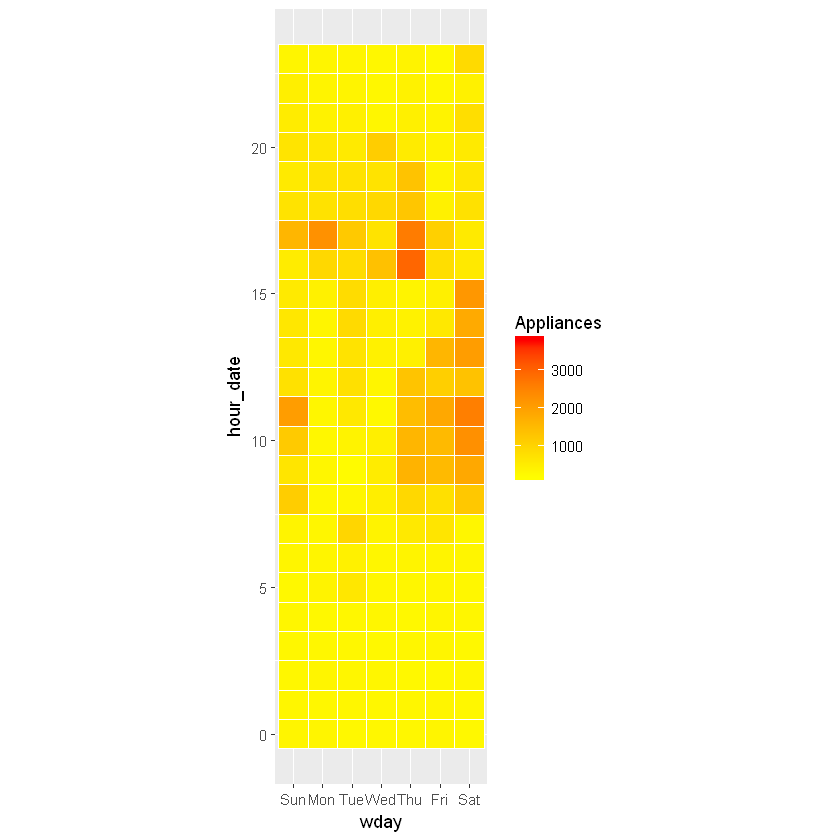

In [68]:
gg1 + geom_tile(color = 'white') + scale_fill_gradient(low = 'yellow',high ='red',limit = c(150,3800))+coord_equal()

In [69]:
# per week 

In [77]:
energy_usage_per_hour_wk1 <- energy_usage_per_hour[energy_usage_per_hour$week_of_year == 3,]

In [79]:
gg1 <- ggplot(energy_usage_per_hour_wk1,aes(x=wday,y=hour_date,
                                                          fill=Appliances)) 

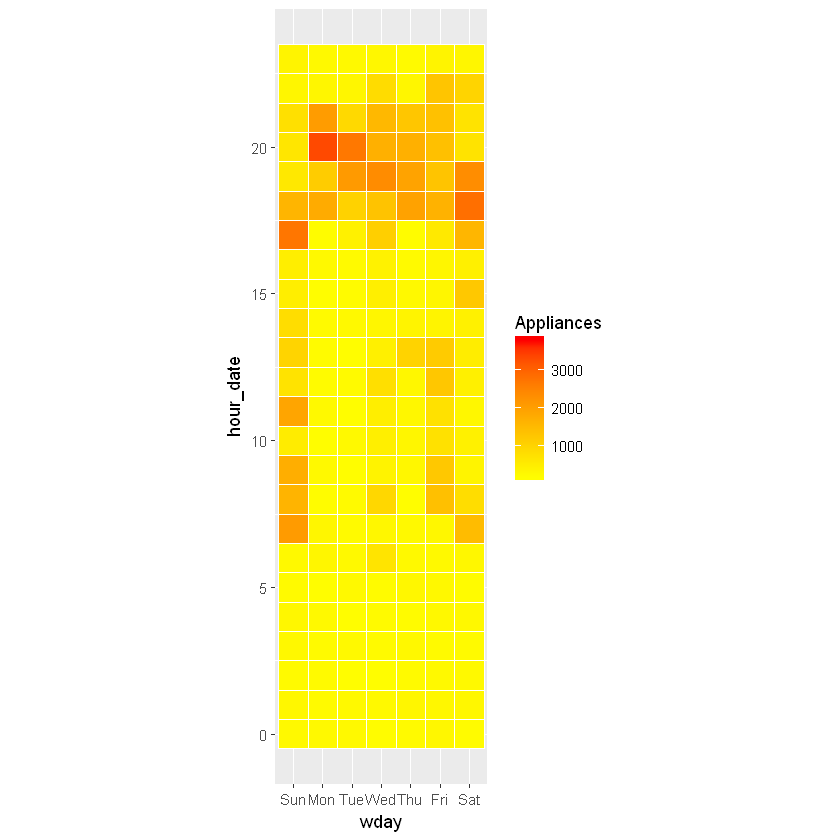

In [88]:
gg1 + geom_tile(color = 'white',size = 0.5) + scale_fill_gradient(low = 'yellow',high ='red',limit = c(150,3800))+coord_equal() 


In [89]:
energy_usage_per_hour_wk2 <- energy_usage_per_hour[energy_usage_per_hour$week_of_year == 4,]

In [91]:
gg1 <- ggplot(energy_usage_per_hour_wk2,aes(x=wday,y=hour_date,
                                                          fill=Appliances)) 

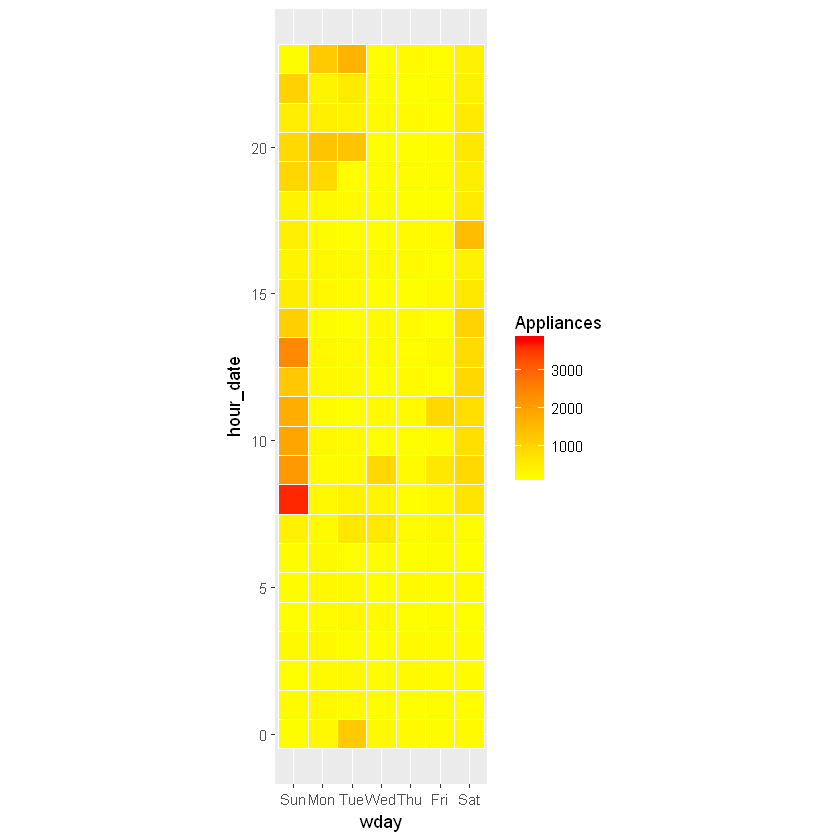

In [93]:
gg1  + geom_tile(color = 'white',size = 0.5) + scale_fill_gradient(low = 'yellow',high ='red',limit = c(150,3800))+coord_equal() 

In [95]:
energy_usage_per_hour_wk3 <- energy_usage_per_hour[energy_usage_per_hour$week_of_year == 5,]

In [96]:
gg1 <- ggplot(energy_usage_per_hour_wk3,aes(x=wday,y=hour_date,
                                                          fill=Appliances)) 

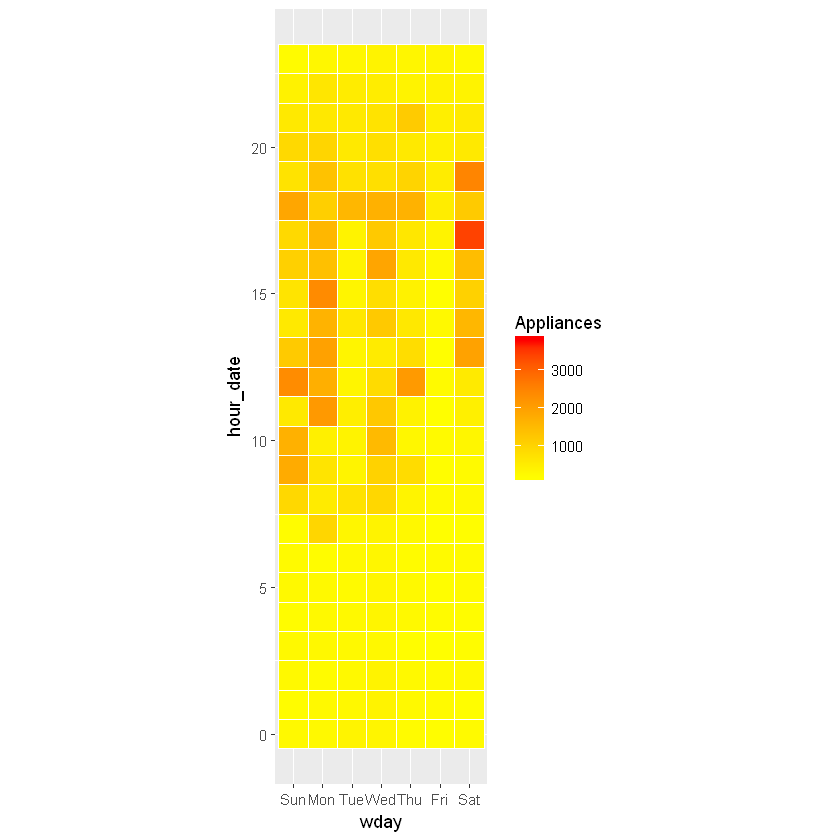

In [97]:
gg1  + geom_tile(color = 'white',size = 0.5) + scale_fill_gradient(low = 'yellow',high ='red',limit = c(150,3800))+coord_equal() 

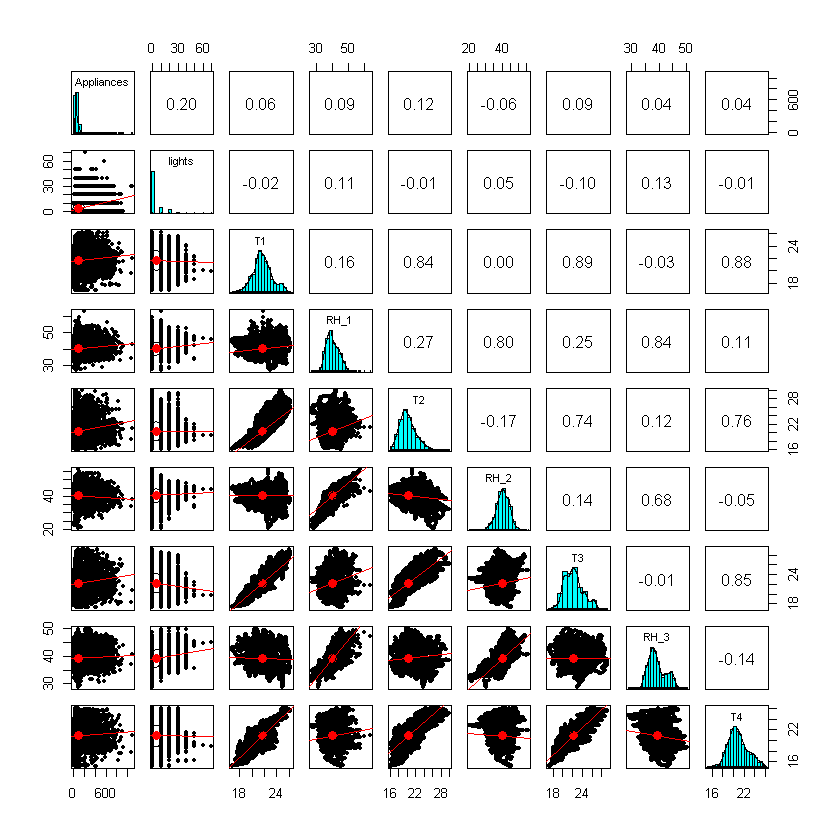

In [105]:
pairs.panels(df[,c(2,3,4,5,6,7,8,9,10)],lm = T)

In [106]:
help(pairs.panels)

In [5]:
library(Boruta) # feature importance

Warning message:
"package 'Boruta' was built under R version 3.4.3"Loading required package: ranger
Warning message:
"package 'ranger' was built under R version 3.4.3"

In [6]:
set.seed(1234)
train_data_imp <- data_train[,c(2:32)][sample(1:nrow(data_train),4400,replace = F),]

In [12]:
#Boruta_feature <- Boruta(Appliances ~., data = train_data_imp,doTrace = 2,ntree = 50)

In [11]:
Boruta_feature

Boruta performed 99 iterations in 5.558925 mins.
 27 attributes confirmed important: Day_of_week, lights, NSM,
Press_mm_hg, RH_1 and 22 more;
 2 attributes confirmed unimportant: rv1, rv2;
 1 tentative attributes left: WeekStatus;

In [12]:
train <- subset(data_train,select = -c(rv1,rv2))

In [13]:
test <- subset(data_test,select = -c(rv1,rv2))

In [16]:
# dummy variables

In [3]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns



In [20]:
names(train)

[1] "date"        "Appliances"  "lights"      "T1"          "RH_1"       
 [6] "T2"          "RH_2"        "T3"          "RH_3"        "T4"         
[11] "RH_4"        "T5"          "RH_5"        "T6"          "RH_6"       
[16] "T7"          "RH_7"        "T8"          "RH_8"        "T9"         
[21] "RH_9"        "T_out"       "Press_mm_hg" "RH_out"      "Windspeed"  
[26] "Visibility"  "Tdewpoint"   "NSM"         "WeekStatus"  "Day_of_week"

In [14]:
new_train <- dummy.data.frame(train,names = c('WeekStatus','Day_of_week'))

In [15]:
names(new_train)

[1] "date"                 "Appliances"           "lights"              
 [4] "T1"                   "RH_1"                 "T2"                  
 [7] "RH_2"                 "T3"                   "RH_3"                
[10] "T4"                   "RH_4"                 "T5"                  
[13] "RH_5"                 "T6"                   "RH_6"                
[16] "T7"                   "RH_7"                 "T8"                  
[19] "RH_8"                 "T9"                   "RH_9"                
[22] "T_out"                "Press_mm_hg"          "RH_out"              
[25] "Windspeed"            "Visibility"           "Tdewpoint"           
[28] "NSM"                  "WeekStatusWeekday"    "WeekStatusWeekend"   
[31] "Day_of_weekFriday"    "Day_of_weekMonday"    "Day_of_weekSaturday" 
[34] "Day_of_weekSunday"    "Day_of_weekThursday"  "Day_of_weekTuesday"  
[37] "Day_of_weekWednesday"

In [16]:
new_test <- dummy.data.frame(test,names = c('WeekStatus','Day_of_week'))

In [6]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"

In [16]:
rfecontrol = rfeControl(functions = rfFuncs,method = 'cv',number = 2)

In [11]:
help(rfe)

In [ ]:
results <- rfe(new_train[,c(3:37)], new_train[,2] , sizes=c(1:35), rfeControl=rfecontrol)

In [67]:
lmcvFit <- train(Appliances~., data=new_train[,c(2:37)],  method="lm",
                 metric='RMSE',trControl = fitcontral)


Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdat

In [68]:
summary(lmcvFit)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-250.01  -43.56  -18.68    8.00  883.51 

Coefficients: (3 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -7.392e+01  1.096e+02  -0.675 0.499954    
lights                1.855e+00  1.110e-01  16.713  < 2e-16 ***
T1                   -5.916e+00  2.144e+00  -2.759 0.005799 ** 
RH_1                  1.451e+01  7.778e-01  18.656  < 2e-16 ***
T2                   -1.789e+01  1.884e+00  -9.494  < 2e-16 ***
RH_2                 -1.384e+01  8.826e-01 -15.677  < 2e-16 ***
T3                    2.637e+01  1.224e+00  21.540  < 2e-16 ***
RH_3                  6.289e+00  7.891e-01   7.969 1.72e-15 ***
T4                    9.245e-01  1.223e+00   0.756 0.449637    
RH_4                 -4.849e-01  7.451e-01  -0.651 0.515160    
T5                   -1.460e+00  1.356e+00  -1.077 0.281558    
RH_5                  6.803e-02  1.0

In [20]:
residuals<-resid(lmcvFit)

predictedValues<-predict(lmcvFit)

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

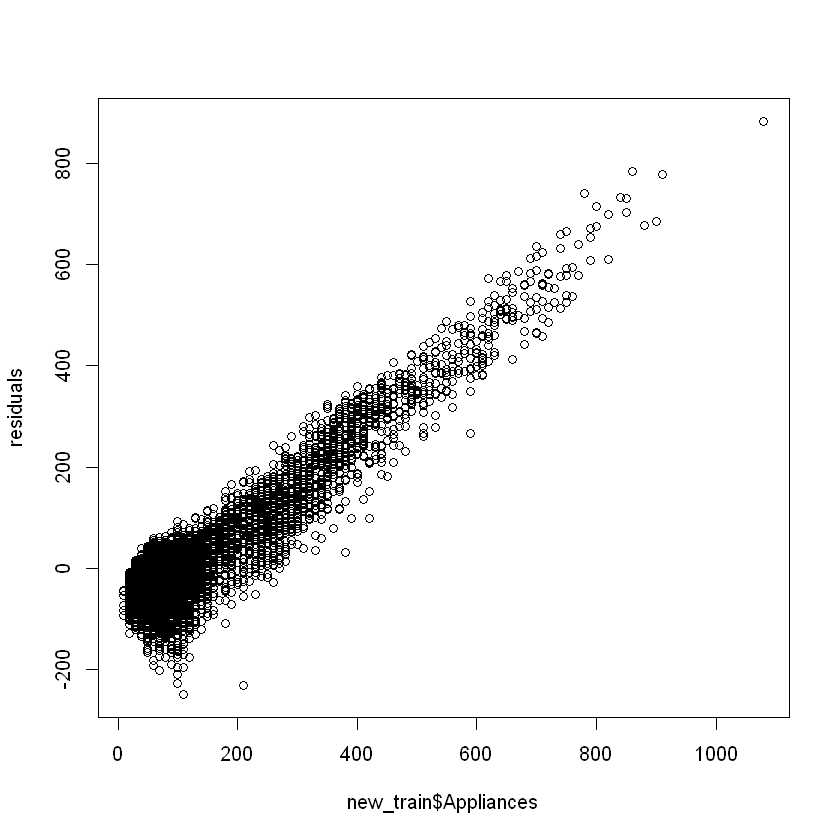

In [69]:
plot(new_train$Appliances,residuals)

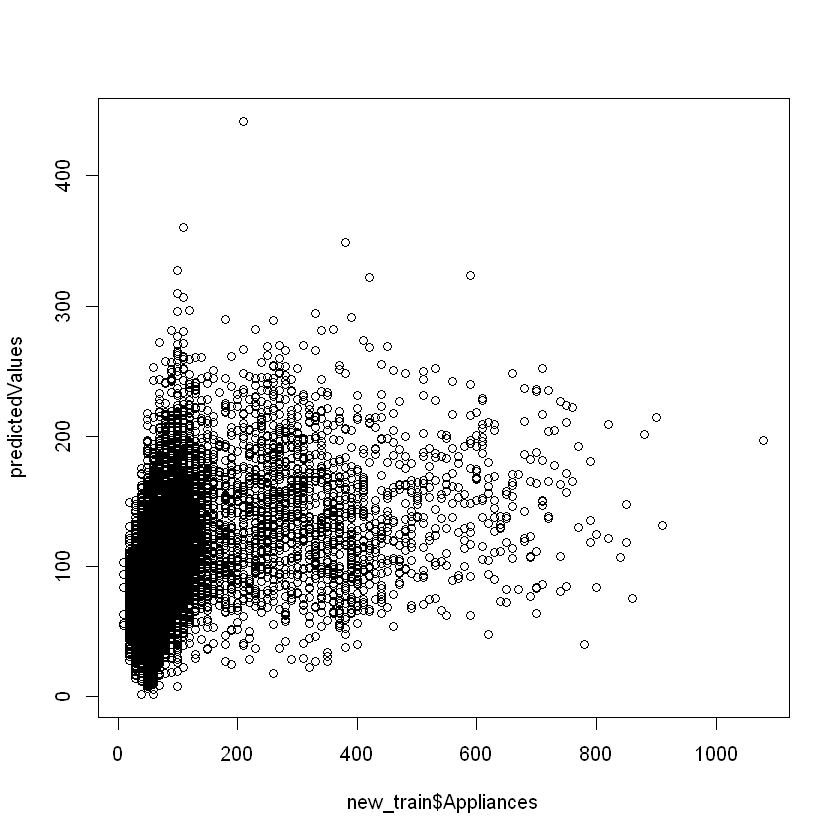

In [70]:
plot(new_train$Appliances,predictedValues)

In [23]:
lmcvFit$finalModel


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
         (Intercept)                lights                    T1  
          -7.392e+01             1.855e+00            -5.916e+00  
                RH_1                    T2                  RH_2  
           1.451e+01            -1.789e+01            -1.384e+01  
                  T3                  RH_3                    T4  
           2.637e+01             6.289e+00             9.245e-01  
                RH_4                    T5                  RH_5  
          -4.849e-01            -1.460e+00             6.803e-02  
                  T6                  RH_6                    T7  
           7.074e+00             2.903e-01             1.411e+00  
                RH_7                    T8                  RH_8  
          -1.626e+00             8.346e+00            -4.135e+00  
                  T9                  RH_9                 T_out  
          -1.305e+01            -3.801e-01            -9.701e+00  
 

In [24]:
varImp(lmcvFit)

lm variable importance

  only 20 most important variables shown (out of 32)

                    Overall
T3                   100.00
RH_1                  86.56
lights                77.50
RH_2                  72.67
T6                    44.74
T2                    43.84
RH_8                  41.73
RH_3                  36.74
T8                    33.11
NSM                   29.72
T9                    29.06
Day_of_weekFriday     25.64
T_out                 25.48
Day_of_weekSaturday   24.72
Windspeed             20.17
RH_6                  16.92
Day_of_weekMonday     16.56
RH_7                  14.76
Visibility            12.72
T1                    12.45

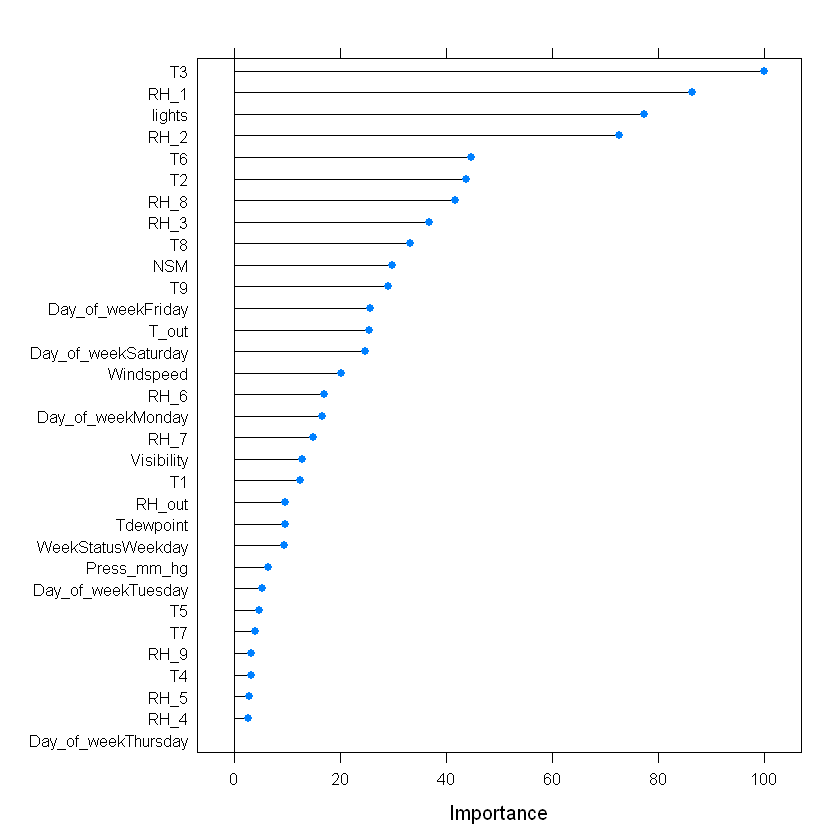

In [71]:
plot(varImp(lmcvFit))

In [31]:
fitcontral <- trainControl(method = 'repeatedcv',number = 5,repeats = 2,returnResamp = 'all')

In [36]:

gbmGrid <-  expand.grid(interaction.depth = c(1,3,5),
                        n.trees = seq(100,400),
                        shrinkage = 0.1,
                        n.minobsinnode = c(10))

In [37]:
gbm <- train(Appliances ~. ,data = new_train[,c(2,37)],method = "gbm",metric = 'RMSE',trControl = fitcontral,tuneGrid = gbmGrid)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1    10535.9709             nan     0.1000    2.1547
     2    10533.1809             nan     0.1000    1.9569
     3    10531.9351             nan     0.1000    1.3942
     4    10530.7384             nan     0.1000    1.4150
     5    10529.2917             nan     0.1000    0.0926
     6    10527.9721             nan     0.1000   -0.6216
     7    10527.3023             nan     0.1000    0.1630
     8    10526.5631             nan     0.1000    0.1729
     9    10525.9890             nan     0.1000    0.3940
    10    10525.4918             nan     0.1000   -0.1709
    20    10524.4591             nan     0.1000   -1.2898
    40    10524.3547             nan     0.1000   -0.2495
    60    10524.1981             nan     0.1000   -0.0124
    80    10524.2413             nan     0.1000   -0.0317
   100    10524.2618             nan     0.1000   -0.3325
   120    10524.2265             nan     0.1000   -0.5192
   140    1052

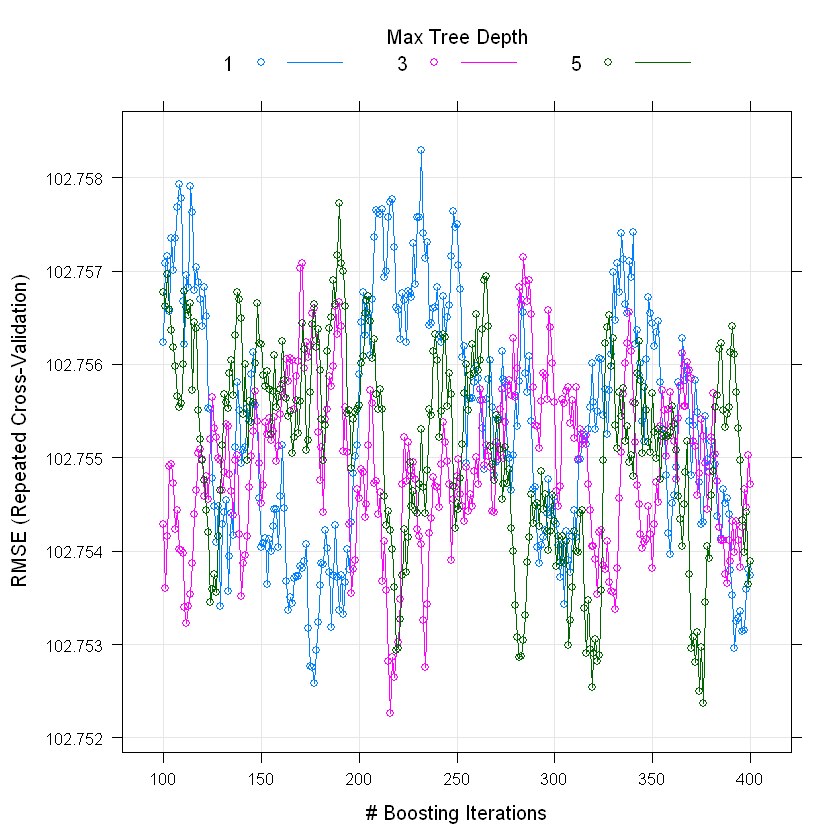

In [40]:
plot(gbm)

In [43]:
gbm$bestTune

,n.trees,interaction.depth,shrinkage,n.minobsinnode
418,216,3,0.1,10


In [45]:
library(Metrics)

Warning message:
"package 'Metrics' was built under R version 3.4.3"

In [62]:
pred = predict(gbm,new_test[,c(3:37)])

In [63]:
rmse(new_test$Appliances,pred)

[1] 101.5956

In [66]:
rmse(new_train$Appliances,predict(gbm,new_train[,c(3:37)]))

[1] 102.7634